In [ ]:
import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys




In [ ]:
path='GHI01-Jan-202228-Feb-2022.csv'
df = pd.read_csv(path, names=['Id', 'Date', 'Value'])    #ca trouvait pas le file quand le notebook etait dans code 
                            # oui coco j'ai essaye .append jsp quoi, j'ai pas reussi donc si toi tu 
                            #reussis dis moi

In [ ]:
df.head()


In [ ]:
df = df.iloc[1: , :]  #on drop la premiere ligne 

In [ ]:
df.head()


In [ ]:
df['Day'] = df['Date'].str[:2]
df['Day'] = df['Day'].astype(int)
df['Month']=df['Date'].str[3:6]
df['Year']=df['Date'].str[7:11]
df['Year']=df['Year'].astype(int)
df['Hour']=df['Date'].str[12:14]
df['Hour']=df['Hour'].astype(int)
df['Minute']=df['Date'].str[15:17]
df['Minute']=df['Minute'].astype(int)
df['Second']=df['Date'].str[18:20]
df['Second']=df['Second'].astype(int)

In [ ]:
df.head()


In [ ]:
month_nums = {"Month":     {"Jan": 1, "Feb": 2}}
df=df.replace(month_nums)

In [ ]:
df.head()

In [ ]:
df["Second"].value_counts()
#on a que des 0 pour les secondes => drop la colonne?

In [ ]:
#df.plot(x='Hour', y='Value', kind='line')

In [ ]:
#marche pas 
fig, axs = plt.subplots(figsize=(12, 4))

df["Hour"].plot(
    kind='line', rot=0, ax=axs
)



plt.xlabel("Hour of the day")

plt.ylabel("Value")

In [ ]:
path='GHI01-Jan-202228-Feb-2022.csv'
df = pd.read_csv(path, names=['Id', 'Date', 'Value']) 
df = df.iloc[1: , :]  #on drop la premiere ligne 
#month_nums = {"Date": {"Jan": "01", "Feb": "02"}}
df["Date"]=df["Date"].str.replace("Jan","01")
df["Date"]=df["Date"].str.replace("Feb","02")
df.head()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y %H:%M:%S")

In [ ]:
df.head()

In [ ]:
df["Date"].min(), df["Date"].max()

In [ ]:
df=df.drop(['Id'], axis=1)

In [ ]:
df['Value']=df['Value'].astype(float)

In [ ]:

consommation = df.set_index("Date")


consommation.head()

In [ ]:

ax=consommation[df["Date"].min():df["Date"].max()].plot(title='Plot')

plt.xlabel('Date')
plt.ylabel('Consommation')
plt.show()


In [ ]:
ax=consommation['2022-01-10 00:00:00':'2022-01-17 00:00:00'].plot(title='Plot')

plt.xlabel('Date')
plt.ylabel('Consommation')
plt.show()

In [ ]:
df_jan = pd.read_csv('GHI01-Jan-202228-Feb-2022.csv', names=['Id', 'Date', 'Value']) 
df_jan = df_jan.iloc[1: , :] 
df_mar = pd.read_csv('GHI01-Mar-202230-Apr-2022.csv', names=['Id', 'Date', 'Value']) 
df_mar = df_mar.iloc[1: , :] 
df_may = pd.read_csv('GHI01-May-202230-Jun-2022.cvs', names=['Id', 'Date', 'Value']) 
df_may = df_may.iloc[1: , :] 
df_jul = pd.read_csv('GHI01-Jul-202231-Aug-2022.cvs', names=['Id', 'Date', 'Value']) 
df_jul = df_jul.iloc[1: , :]
df_sep = pd.read_csv('GHI01-Sep-202231-Oct-2022.cvs', names=['Id', 'Date', 'Value']) 
df_sep = df_sep.iloc[1: , :]  
df = pd.concat([df_jan,df_mar,df_may,df_jul,df_sep])
df=df.drop(['Id'], axis=1)
df['Value']=df['Value'].astype(float)
df["Date"]=df["Date"].str.replace("Jan","01")
df["Date"]=df["Date"].str.replace("Feb","02")
df["Date"]=df["Date"].str.replace("Mar","03")
df["Date"]=df["Date"].str.replace("Apr","04")
df["Date"]=df["Date"].str.replace("May","05")
df["Date"]=df["Date"].str.replace("Jun","06")
df["Date"]=df["Date"].str.replace("Jul","07")
df["Date"]=df["Date"].str.replace("Aug","08")
df["Date"]=df["Date"].str.replace("Sep","09")
df["Date"]=df["Date"].str.replace("Oct","10")
df["Date"]=df["Date"].str.replace("Nov","11")
df["Date"]=df["Date"].str.replace("Dec","12")
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y %H:%M:%S")

In [ ]:
consommation = df.set_index("Date")
ax=consommation[df["Date"].min():df["Date"].max()].plot(title='Plot')

plt.xlabel('Date')
plt.ylabel('Consommation')
plt.show()

In [ ]:
def plot_consommation(df, start, end):
    consommation = df.set_index("Date") 
    ax=consommation[start:end].plot(title='Plot')
    plt.xlabel('Date')
    plt.ylabel('Consommation')
    plt.show()



In [ ]:
def plot_scrollable_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()


In [ ]:
plot_scrollable_consommation_over_time_detailed_graph()

In [1]:

import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import sys
matplotlib.rcParams["figure.facecolor"] = "white"

In [67]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

In [6]:
#function to plot the value for a chosen day that is a parameter

def plot_consommation_over_time_day(day):
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df[df['Date'].dt.day == day]['Date'], df[df['Date'].dt.day == day]['Value'], color='red', label= "Free hours")
    ax.plot( df[(df['Date'].dt.day == day) & (df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)]['Date'], df[(df['Date'].dt.day == day) & (df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)]['Value'], color='blue', label= "Working hours")
    ax.set_title("Consommation over time of the 10th day of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df[df['Date'].dt.day == day]['Date'].min(), df[df['Date'].dt.day == day]['Date'].min() + pd.Timedelta(days=0.5))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()


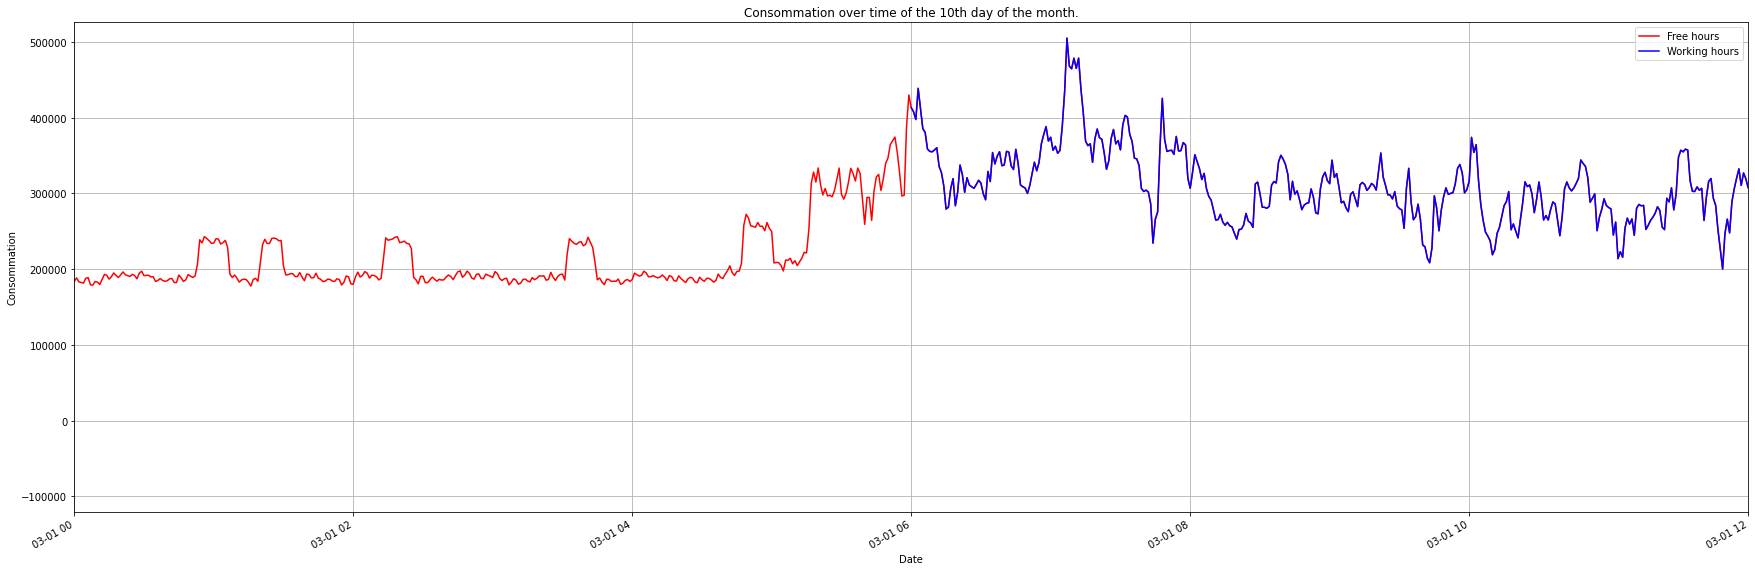

In [22]:
#add a column binary that is 1 if the minutes are between 15 and 30 and 0 otherwise
df['Peak'] = np.where((df['Date'].dt.minute >= 1) & (df['Date'].dt.minute < 15), 1, 0)

In [23]:
df.head()

,Date,Value,binary,peak,Peak
79143,2022-02-18 15:39:00,212141.645,0,0,0
79144,2022-02-18 15:40:00,216980.618,0,0,0
79145,2022-02-18 15:41:00,219702.692,0,0,0
79146,2022-02-18 15:42:00,218002.962,0,0,0
79147,2022-02-18 15:43:00,219366.764,0,0,0


In [24]:
def plot_consommation_over_time_day(day):
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df[df['Date'].dt.day == day]['Date'], df[df['Date'].dt.day == day]['Value'], color='red', label= "Normal hours")
    ax.plot( df[(df['Peak']==1)]['Date'],df[(df['Peak']==1)]['Value'], color='blue', label= "Peak hours")
    ax.set_title("Consommation over time of the 10th day of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df[df['Date'].dt.day == day]['Date'].min(), df[df['Date'].dt.day == day]['Date'].min() + pd.Timedelta(days=1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

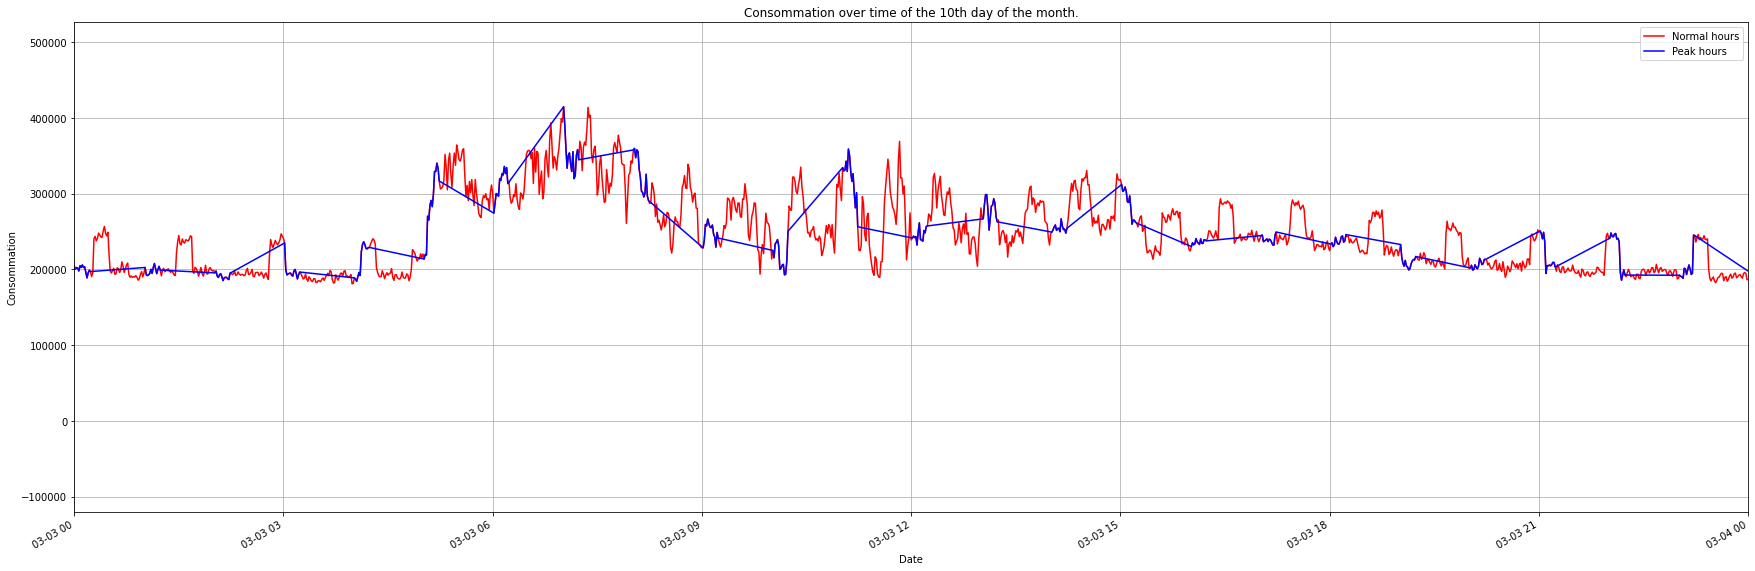

In [25]:
plot_consommation_over_time_day(3)

In [68]:
#normalize the value column with mean and variance
df['Value'] = (df['Value'] - df['Value'].mean()) / df['Value'].std()

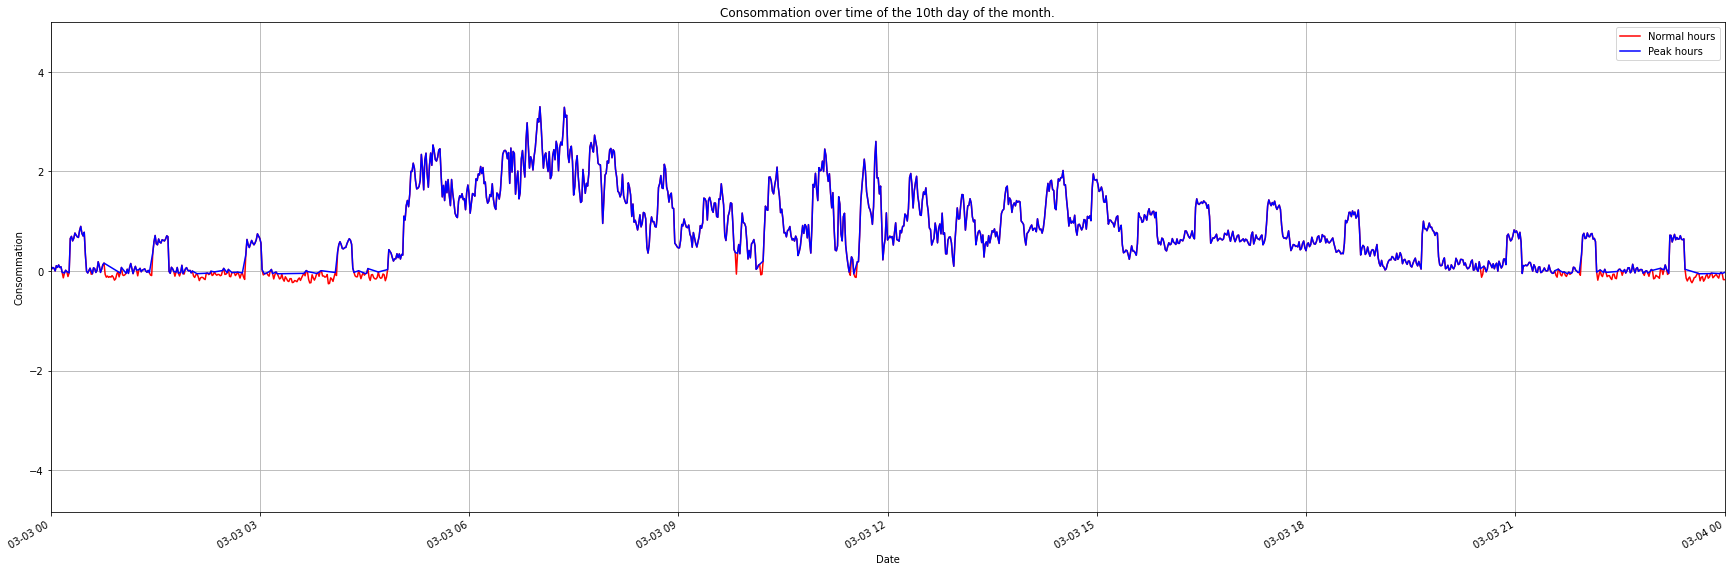

In [47]:
#plot the normalized value for a chosen day that is a parameter
def plot_consommation_over_time_day_normalized(day):
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df[df['Date'].dt.day == day]['Date'], df[df['Date'].dt.day == day]['Value'], color='red', label= "Normal hours")
    ax.plot( df[(df['Peak']==1)]['Date'],df[(df['Peak']==1)]['Value'], color='blue', label= "Peak hours")
    ax.set_title("Consommation over time of the 10th day of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df[df['Date'].dt.day == day]['Date'].min(), df[df['Date'].dt.day == day]['Date'].min() + pd.Timedelta(days=1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_day_normalized(3)

In [53]:
# there are peaks every hour and their values change from hour to hour so we want to find a treshold to identify them
# we will use the mean of the non peak values to find the treshold

#function for non working hours compute the median for each day from df
def compute_median_non_working_hours(df):
    median_non_working_hours = []
    for i in range(1, 31):
        median_non_working_hours.append(df[(df['Date'].dt.day == i) & (df['Date'].dt.hour >= 19) | (df['Date'].dt.hour < 6)]['Value'].median())
    return median_non_working_hours

#add a coolumn median_non_working_hours to df
df['median_non_working_hours'] = compute_median_non_working_hours(df)

#if the value is greater than the median_non_working_hours then it is a peak
df['Peak'] = np.where(df['Value'] > df['median_non_working_hours'], 1, 0)






,Hour,Threshold
0,15,-0.412949
1,16,-0.205595
2,17,-0.062035
3,18,-0.000682
4,19,-0.024621
5,20,-0.075400
6,21,-0.136182
7,22,-0.192384
8,23,-0.230240
9,0,-0.247553


In [59]:
#function to find the median of the hour with parameter hour and day
def find_median_hour_day(hour, day):
    return df[(df['Date'].dt.hour == hour) & (df['Date'].dt.day == day)]['Value'].median()

#iterate over each month
for month in df['Date'].dt.month.unique():
    #iterate over each day
    for day in df[df['Date'].dt.month == month]['Date'].dt.day.unique():
        #iterate over each hour
        for hour in df[(df['Date'].dt.month == month) & (df['Date'].dt.day == day)]['Date'].dt.hour.unique():
            #find the median of the hour
            median = find_median_hour_day(hour, day)
            #iterate over each minute
            for minute in df[(df['Date'].dt.month == month) & (df['Date'].dt.day == day) & (df['Date'].dt.hour == hour)]['Date'].dt.minute.unique():
                #find the index of the row with the same date and hour
                index = df[(df['Date'].dt.month == month) & (df['Date'].dt.day == day) & (df['Date'].dt.hour == hour) & (df['Date'].dt.minute == minute)].index[0]
                #add the median to the row
                df.loc[index, 'Median'] = median
                #add 1 to the column Above_Median if the value is above the median and 0 otherwise
                df.loc[index, 'Above_Median'] = 1 if df.loc[index, 'Value'] > df.loc[index, 'Median'] else 0

            


KeyboardInterrupt: 

In [62]:
#compute the median for an hour
def compute_median_hour(hour):
    median_hour = []
    for i in range(1, 31):
        median_hour.append(df[(df['Date'].dt.day == i) & (df['Date'].dt.hour == hour)]['Value'].median())
    return median_hour


In [69]:
#make a dafarame with only the first week
df_first_week = df[df['Date'].dt.day < 8]


In [70]:
df_first_week.head()

,Date,Value
236511,2022-03-01 00:00:00,-0.211564
236512,2022-03-01 00:01:00,-0.139940
236513,2022-03-01 00:02:00,-0.219808
236514,2022-03-01 00:03:00,-0.232803
236515,2022-03-01 00:04:00,-0.245588


In [73]:
df_first_week.tail()

,Date,Value
353359,2022-11-07 23:55:00,0.336437
353360,2022-11-07 23:56:00,0.332337
353361,2022-11-07 23:57:00,-0.128578
353362,2022-11-07 23:58:00,-0.192281
353363,2022-11-07 23:59:00,-0.247313


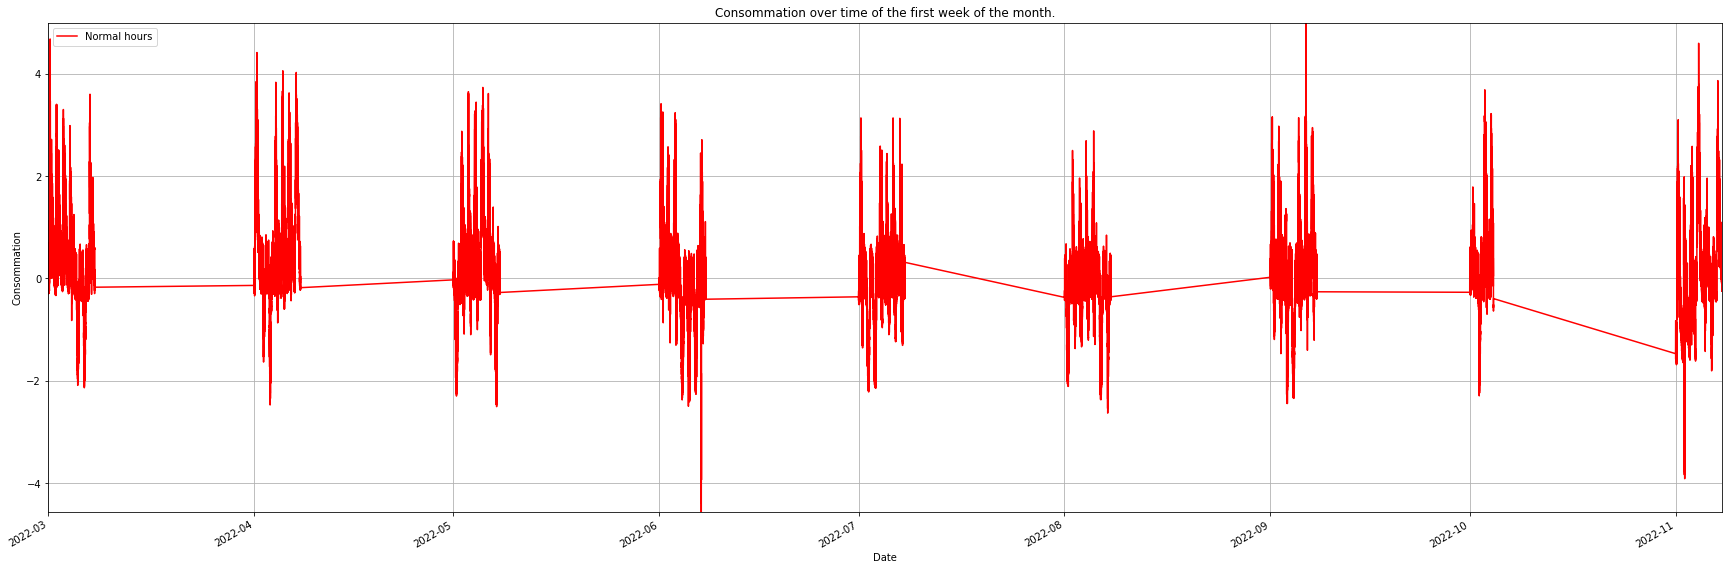

In [71]:
#plot the value for the first week
def plot_consommation_over_time_first_week():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df_first_week['Date'], df_first_week['Value'], color='red', label= "Normal hours")
    #ax.plot( df_first_week[(df_first_week['Peak']==1)]['Date'],df_first_week[(df_first_week['Peak']==1)]['Value'], color='blue', label= "Peak hours")
    ax.set_title("Consommation over time of the first week of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df_first_week['Date'].min(), df_first_week['Date'].max())
    ax.set_ylim(df_first_week['Value'].min(), df_first_week['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_first_week()

In [65]:
#calculate the median for each hour of the first week for df_first_week
for hour in df_first_week['Date'].dt.hour.unique():
    df_first_week['Median_hour_' + str(hour)] = compute_median_hour(hour)

#add a column to df_first_week that the median of the hour
df_first_week['Median'] = df_first_week[['Median_hour_' + str(hour) for hour in df_first_week['Date'].dt.hour.unique()]].median(axis=1)

ValueError: Length of values (30) does not match length of index (94209)

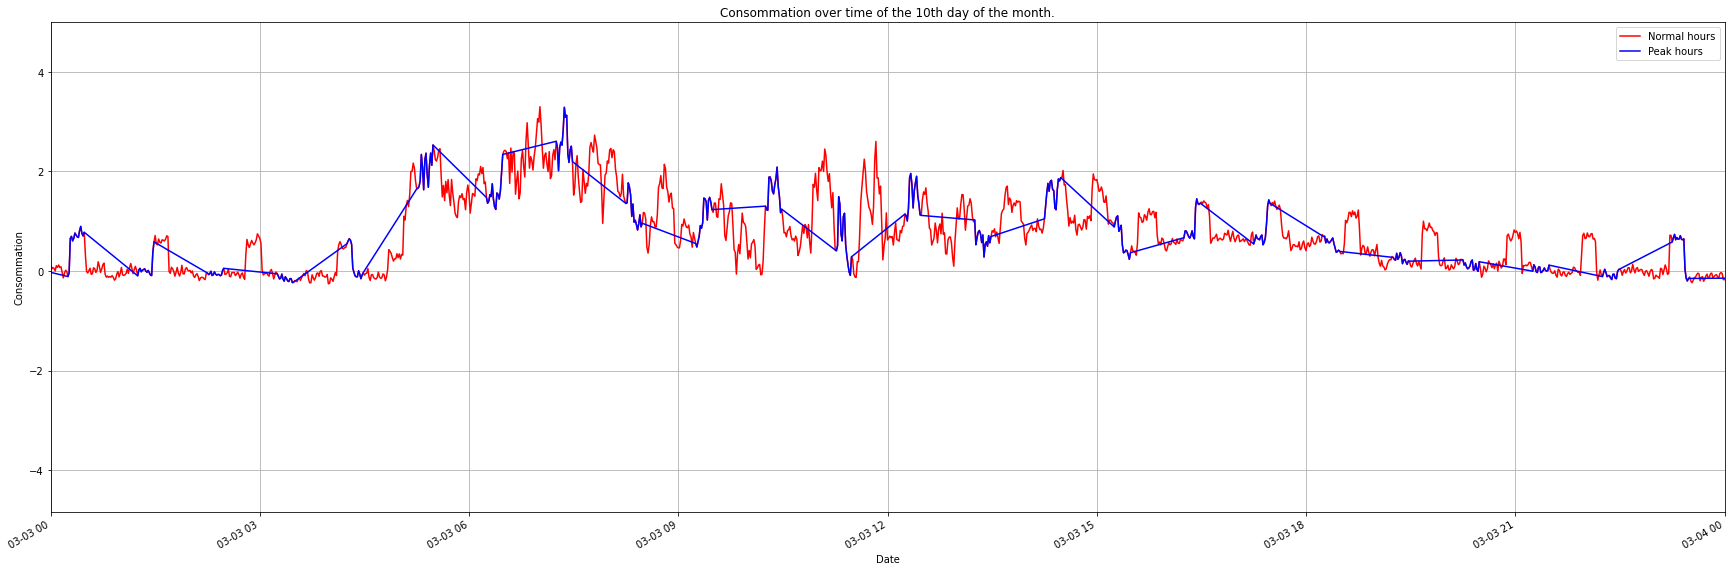

In [61]:


#every 1 hour there is a peak of 15 minutes, do column for that 1 if peak 0 otherwise  it is not the same minutes
#plot the normalized value for a chosen day that is a parameter
def plot_consommation_over_time_day_normalized(day):
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df[df['Date'].dt.day == day]['Date'], df[df['Date'].dt.day == day]['Value'], color='red', label= "Normal hours")
    ax.plot( df[(df['Peak']==1)]['Date'],df[(df['Peak']==1)]['Value'], color='blue', label= "Peak hours")
    ax.set_title("Consommation over time of the 10th day of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df[df['Date'].dt.day == day]['Date'].min(), df[df['Date'].dt.day == day]['Date'].min() + pd.Timedelta(days=1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_day_normalized(3)

In [112]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

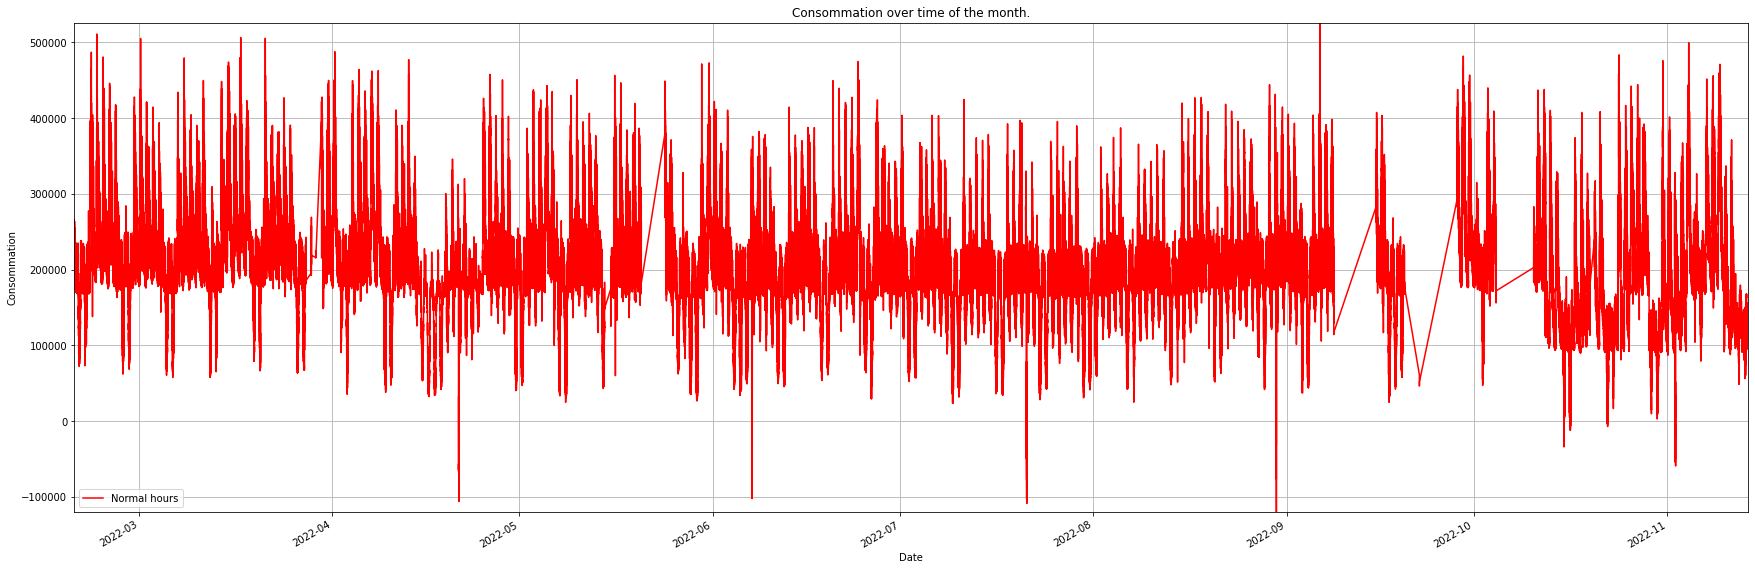

In [113]:
#plot the value over time using df
def plot_consommation_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df['Date'], df['Value'], color='red', label= "Normal hours")
    ax.set_title("Consommation over time of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time()



In [114]:
#normalize the value column with mean and variance
df['Value'] = (df['Value'] - df['Value'].mean()) / df['Value'].std()

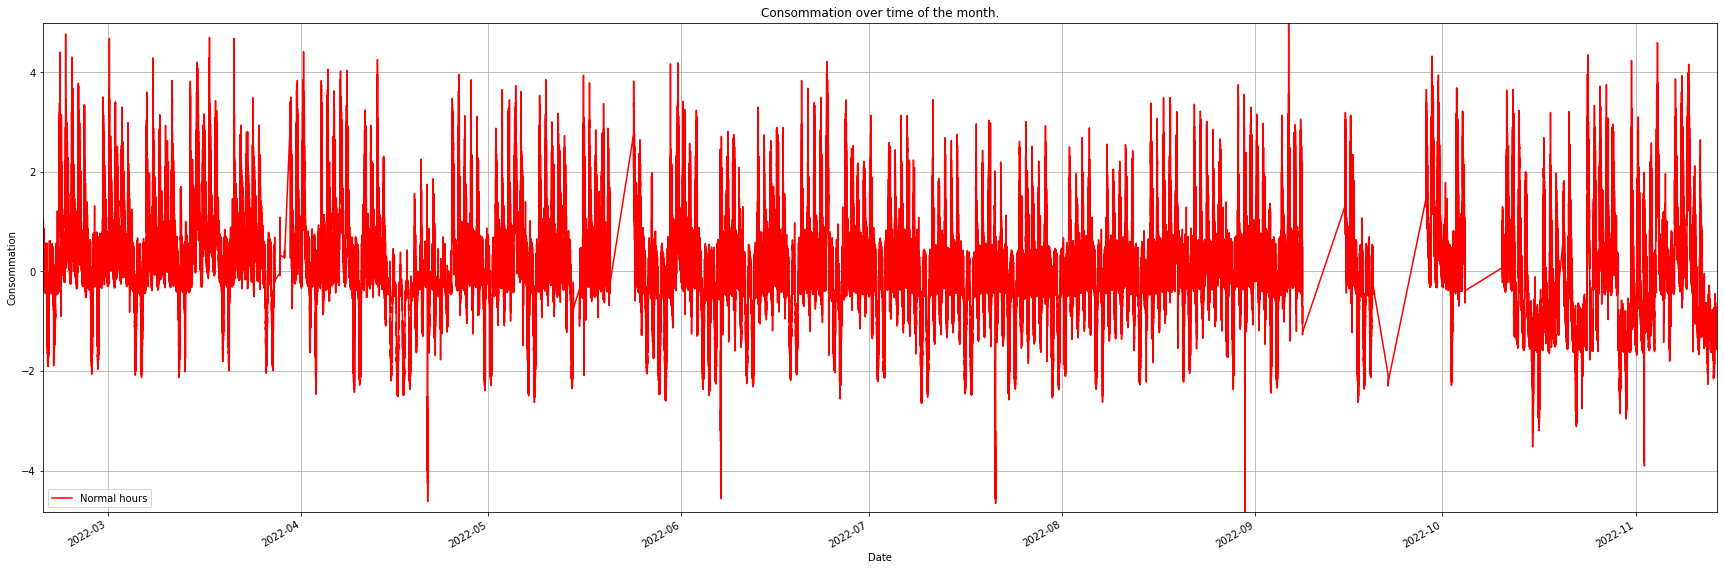

In [115]:
plot_consommation_over_time()

In [116]:
#do a df with only the first 36000 rows
df_first_week = df[:10000]


In [117]:
df_first_week.tail()

,Date,Value
231606,2022-02-25 14:15:00,-0.178214
231607,2022-02-25 14:16:00,-0.275264
231608,2022-02-25 14:17:00,0.780844
231609,2022-02-25 14:18:00,1.097193
231610,2022-02-25 14:19:00,1.067063


In [118]:
#plot the value for the first week
def plot_consommation_over_time_first_week():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df_first_week['Date'], df_first_week['Value'], color='red', label= "Normal hours")
    ax.set_title("Consommation over time of the first week of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df_first_week['Date'].min(), df_first_week['Date'].max())
    ax.set_ylim(df_first_week['Value'].min(), df_first_week['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

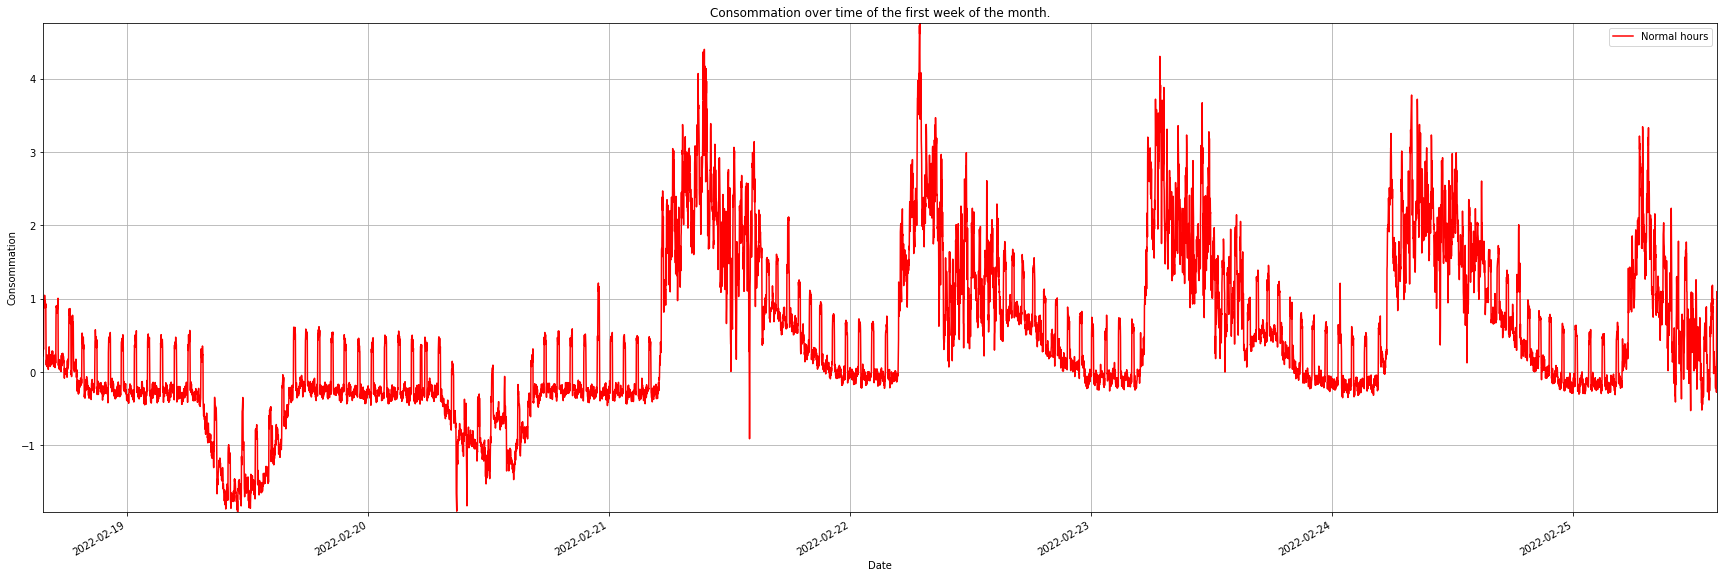

In [119]:
plot_consommation_over_time_first_week()

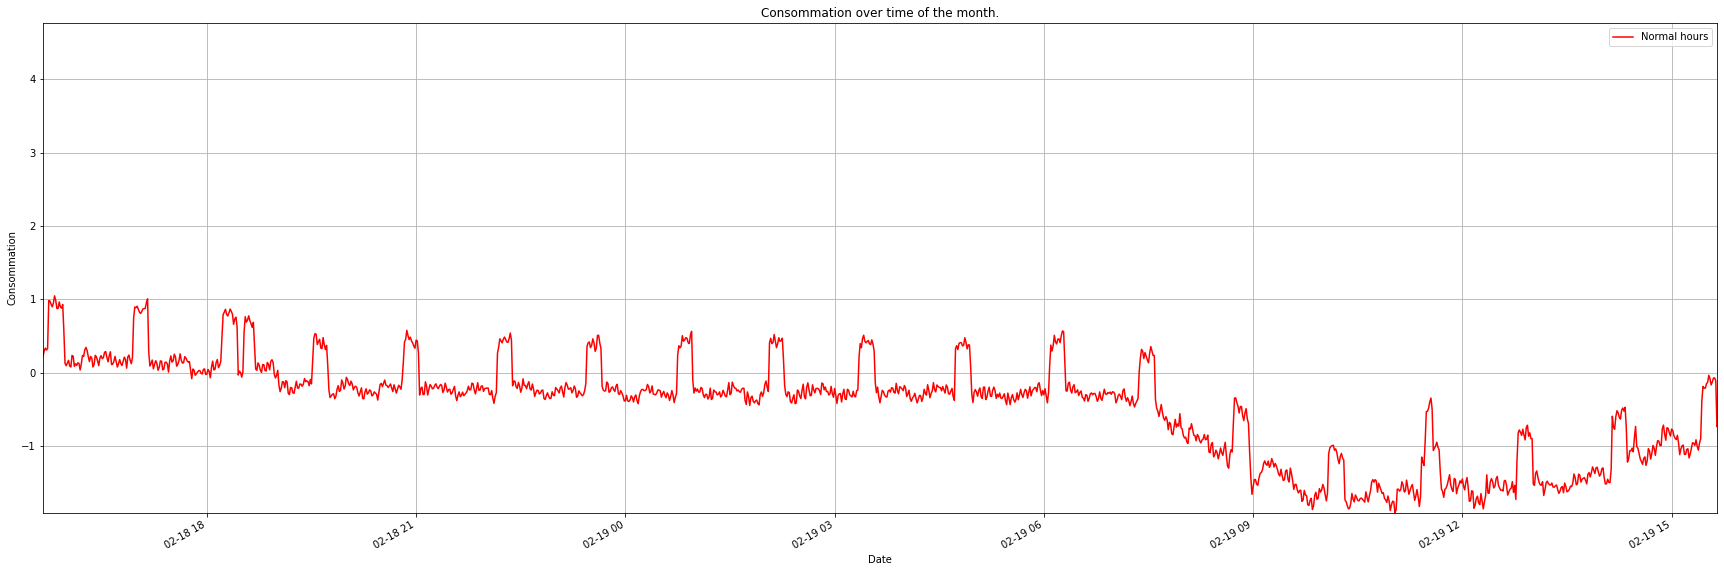

In [120]:
#plot the value over time using df
def plot_consommation_over_time_day():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df_first_week['Date'], df_first_week['Value'], color='red', label= "Normal hours")
    ax.set_title("Consommation over time of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df_first_week['Date'].min(), df_first_week['Date'].min()+ pd.Timedelta(days=1))
    ax.set_ylim(df_first_week['Value'].min(), df_first_week['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_day()

In [148]:
#add a row to df_first_week called peak
df_first_week['Peak'] = 0

#iterate over all the values of the data_frame and every 3600 rows 
j=0
k=0
for i in range(79170, 79170+len(df_first_week)):
    j=j+1
    if j>60:
        k=k+1
        if k != 0:
            df_first_week.loc[i, 'Peak'] = 1
            if k==15:
                k=0
                j=0




In [149]:
df_first_week.head(70)

,Date,Value,Peak
79143,2022-02-18 15:39:00,0.218663,0.0
79144,2022-02-18 15:40:00,0.292261,0.0
79145,2022-02-18 15:41:00,0.333663,0.0
79146,2022-02-18 15:42:00,0.307810,0.0
79147,2022-02-18 15:43:00,0.328553,0.0
...,...,...,...
79208,2022-02-18 16:44:00,0.118531,0.0
79209,2022-02-18 16:45:00,0.176914,0.0
79210,2022-02-18 16:46:00,0.123340,0.0
79211,2022-02-18 16:47:00,0.095929,0.0


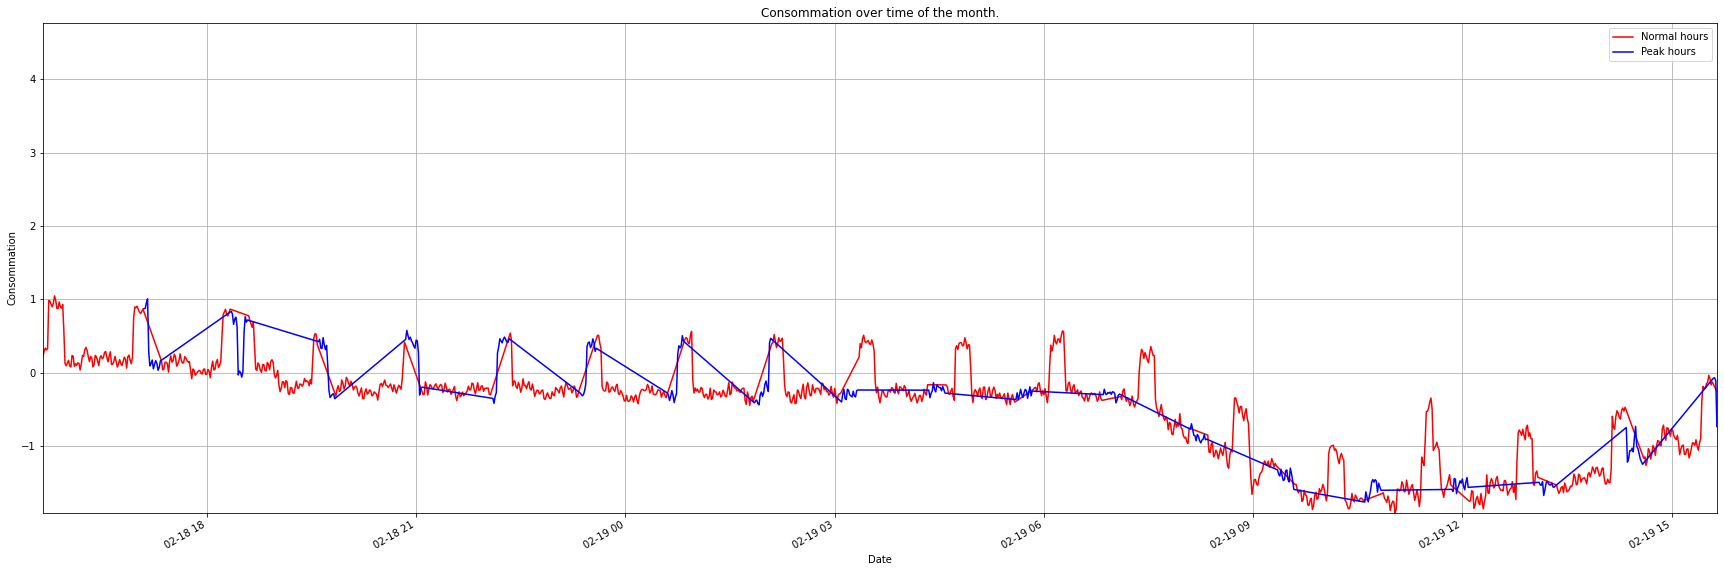

In [150]:
#plot the value over time using df_first_week peaks in a different color
def plot_consommation_over_time_day():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df_first_week[df_first_week['Peak']==0]['Date'], df_first_week[df_first_week['Peak']==0]['Value'], color='red', label= "Normal hours")
    ax.plot( df_first_week[df_first_week['Peak']==1]['Date'],df_first_week[df_first_week['Peak']==1]['Value'], color='blue', label= "Peak hours")
    ax.set_title("Consommation over time of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df_first_week['Date'].min(), df_first_week['Date'].min()+ pd.Timedelta(days=1))
    ax.set_ylim(df_first_week['Value'].min(), df_first_week['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_day()